In [1]:
import numpy as np
import tensorflow as tf
import json
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50
import gc
from tensorflow.keras.backend import clear_session

2024-12-15 17:49:57.827201: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-15 17:49:57.827982: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-15 17:49:57.831624: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-15 17:49:57.841550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734265197.858558   56386 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734265197.86

In [2]:
# Load keypoints data
with open("keypoints (1).json", "r") as file:
    keypoint_data = json.load(file)

In [3]:
# Prepare feature matrix and labels
X = []  # Features
y = []  # Labels

In [4]:
for class_name, samples in keypoint_data.items():
    for sample in samples:
        X.append(sample["keypoints"])
        y.append(class_name)

In [5]:

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [7]:
# Convert to numpy arrays
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)


In [8]:
import tensorflow as tf

# Load your trained model
trained_model = tf.keras.models.load_model("best_pose_detection_model.h5")

trained_model.summary()

2024-12-15 17:50:01.453095: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 82)             │        10,578 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,380 (91.33 KB)

 Trainable params: 23,378 (91.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [9]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("best_pose_detection_model.h5")


In [10]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8083 - loss: 0.8244
Test Accuracy: 81.36%


In [11]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Print a classification report
print(classification_report(y_test, y_pred_classes))

# Print a confusion matrix
print(confusion_matrix(y_test, y_pred_classes))


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.88      0.54      0.67        13
           2       0.87      0.92      0.89        60
           3       0.64      0.71      0.67        42
           4       0.76      0.94      0.84        33
           5       0.94      0.71      0.81        41
           6       0.88      0.94      0.91        48
           7       0.91      0.93      0.92        69
           8       0.93      0.76      0.84        51
           9       0.81      0.80      0.80        44
          10       0.82      0.89      0.85       123
          11       0.55      0.67      0.60        24
          12       0.78      0.93      0.85        46
          13       0.71      0.73      0.72        49
          14       0.72      0.94      0.81        49
          15       0.83      0.62      0.71         8
          16       0.67      0.60      0

In [13]:
print("Shape of X_test:", X_test.shape)


Shape of X_test: (3068, 99)


In [14]:
for i in range(5):  # Display 5 samples
    print(f"Sample {i+1}:")
    print(f"True Label: {y_test[i]}, Predicted Label: {y_pred_classes[i]}")


Sample 1:
True Label: 71, Predicted Label: 71
Sample 2:
True Label: 21, Predicted Label: 22
Sample 3:
True Label: 34, Predicted Label: 34
Sample 4:
True Label: 11, Predicted Label: 11
Sample 5:
True Label: 5, Predicted Label: 64


In [17]:
for i in range(5):  # Display 5 samples
    print(f"Sample {i+1}: True Label: {y_test[i]}, Predicted Label: {y_pred_classes[i]}")


Sample 1: True Label: 71, Predicted Label: 71
Sample 2: True Label: 21, Predicted Label: 22
Sample 3: True Label: 34, Predicted Label: 34
Sample 4: True Label: 11, Predicted Label: 11
Sample 5: True Label: 5, Predicted Label: 64


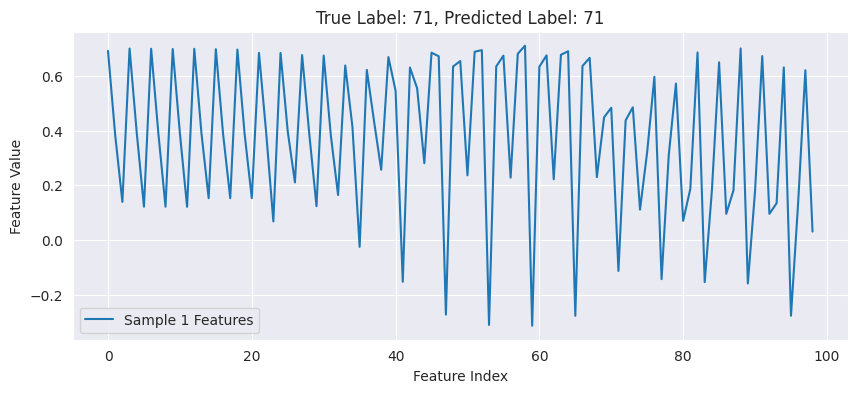

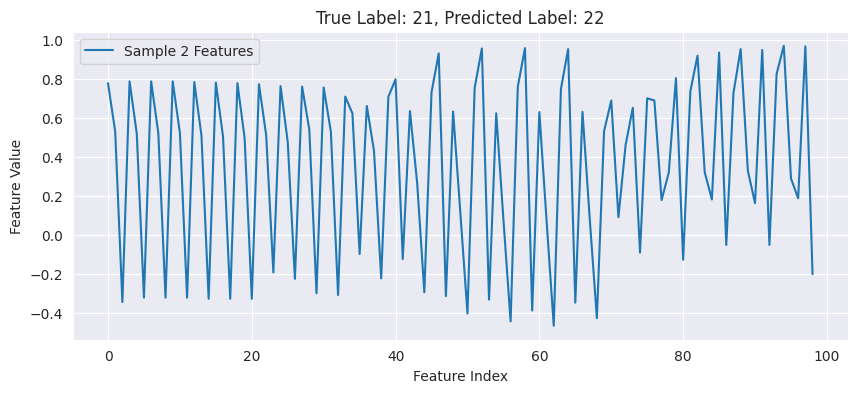

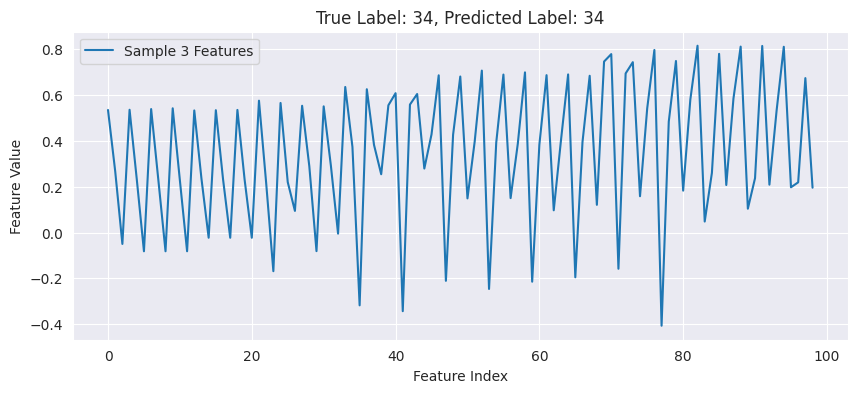

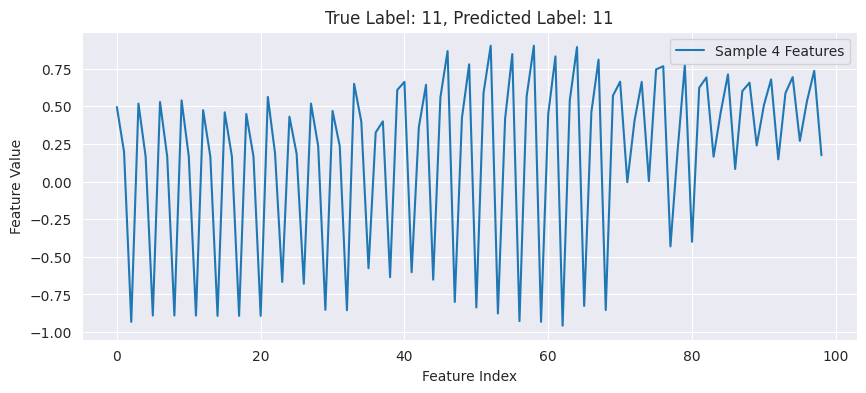

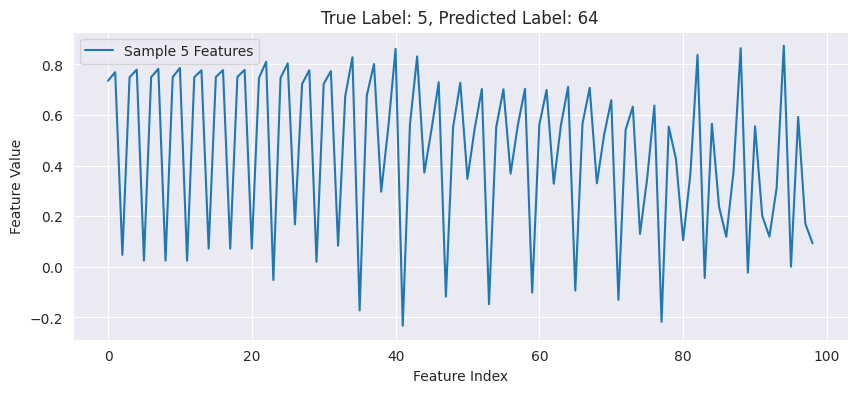

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(5):  # Display 5 samples
    plt.figure(figsize=(10, 4))
    plt.plot(X_test[i], label=f"Sample {i+1} Features")
    plt.title(f"True Label: {y_test[i]}, Predicted Label: {y_pred_classes[i]}")
    plt.xlabel("Feature Index")
    plt.ylabel("Feature Value")
    plt.legend()
    plt.show()
plt.savefig('plot.png')  # Save the plot to a file


In [19]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred_classes))


Model Accuracy: 81.36%
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.88      0.54      0.67        13
           2       0.87      0.92      0.89        60
           3       0.64      0.71      0.67        42
           4       0.76      0.94      0.84        33
           5       0.94      0.71      0.81        41
           6       0.88      0.94      0.91        48
           7       0.91      0.93      0.92        69
           8       0.93      0.76      0.84        51
           9       0.81      0.80      0.80        44
          10       0.82      0.89      0.85       123
          11       0.55      0.67      0.60        24
          12       0.78      0.93      0.85        46
          13       0.71      0.73      0.72        49
          14       0.72      0.94      0.81        49
          15       0.83      0.62      0.71         8
          16       0.67      0.60      0.63        10
    

In [20]:
misclassified = [(i, y_test[i], y_pred_classes[i]) for i in range(len(y_test)) if y_test[i] != y_pred_classes[i]]
print(f"Number of misclassified samples: {len(misclassified)}")
for index, true, pred in misclassified[:5]:  # Display first 5 misclassified samples
    print(f"Sample {index}: True Label: {true}, Predicted Label: {pred}")


Number of misclassified samples: 572
Sample 1: True Label: 21, Predicted Label: 22
Sample 4: True Label: 5, Predicted Label: 64
Sample 5: True Label: 75, Predicted Label: 40
Sample 9: True Label: 78, Predicted Label: 45
Sample 17: True Label: 3, Predicted Label: 11


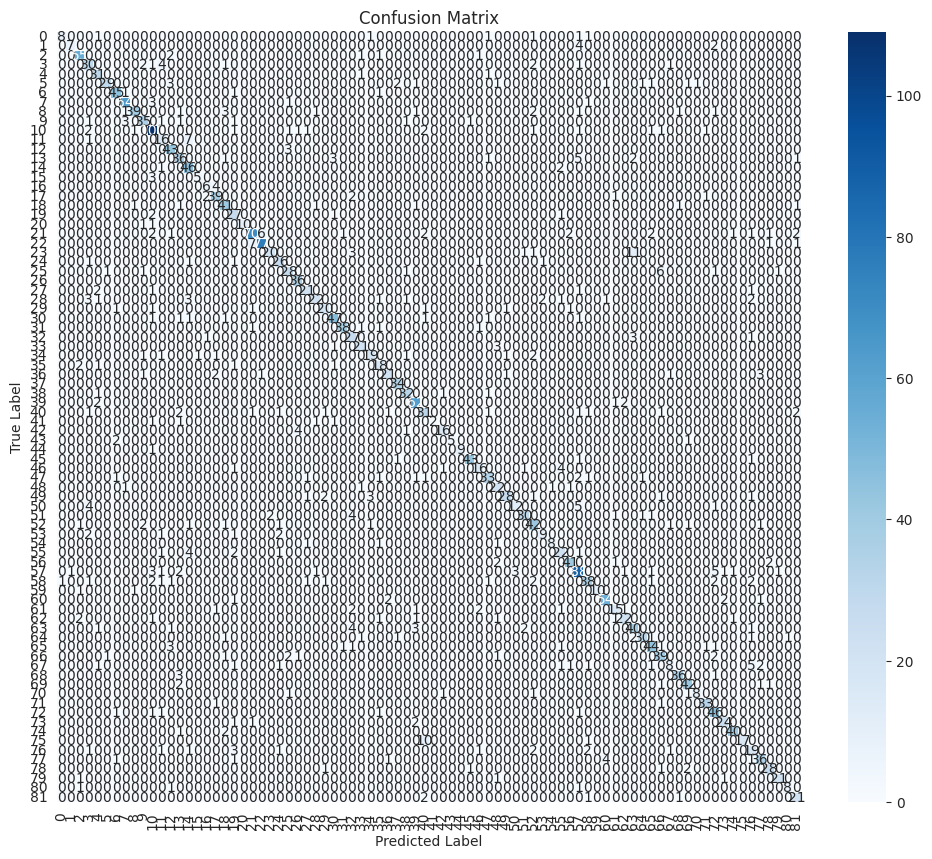

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(82), yticklabels=range(82))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


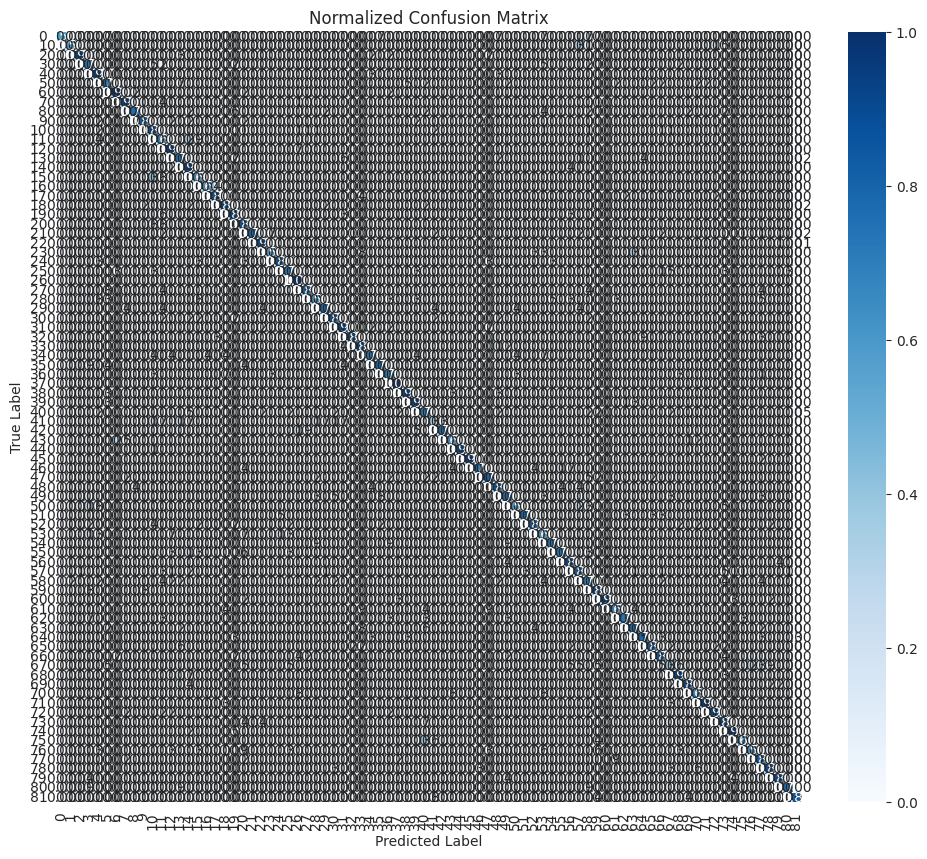

In [22]:
import numpy as np

# Normalize confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=range(82), yticklabels=range(82))
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Top Misclassifications:
    True Label  Predicted Label  Count
0          23               63     11
1          75               40     10
2          11               14      7
3          22               21      7
4          21               22      6
5          25               66      6
6          13               57      5
7          50               57      5
8          57               72      5
9          67               76      5

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.89      0.57      0.70        14
     Class 1       0.88      0.54      0.67        13
     Class 2       0.87      0.92      0.89        60
     Class 3       0.64      0.71      0.67        42
     Class 4       0.76      0.94      0.84        33
     Class 5       0.94      0.71      0.81        41
     Class 6       0.88      0.94      0.91        48
     Class 7       0.91      0.93      0.92        69
     Class 8       0.93      0.76      0.84  

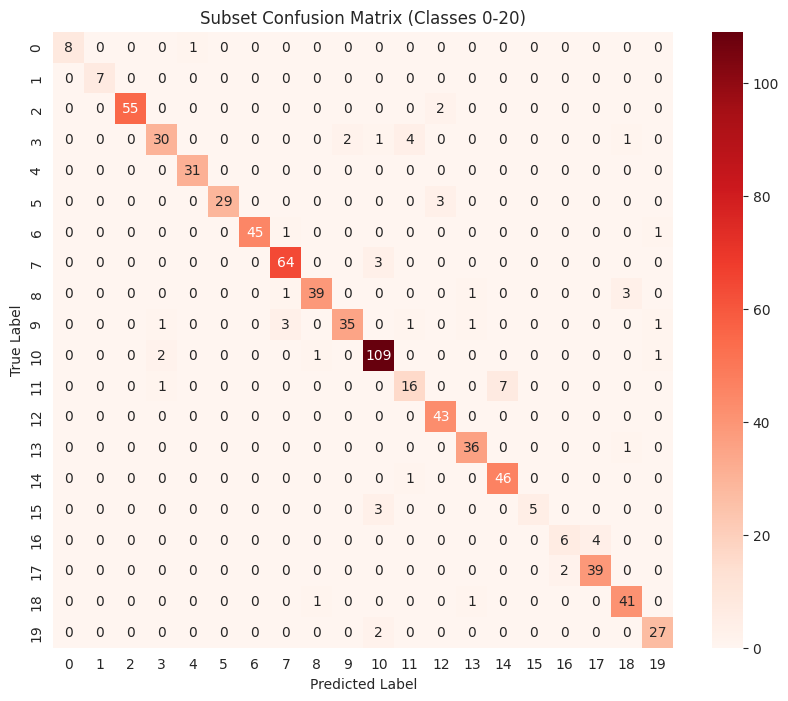

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Compute normalized confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Identify top misclassifications
misclassifications = [
    (i, j, conf_matrix[i, j])
    for i in range(conf_matrix.shape[0])
    for j in range(conf_matrix.shape[1]) if i != j and conf_matrix[i, j] > 0
]
misclassifications = sorted(misclassifications, key=lambda x: x[2], reverse=True)

# Display top misclassifications
top_misclassifications = pd.DataFrame(
    misclassifications[:10],
    columns=["True Label", "Predicted Label", "Count"]
)
print("Top Misclassifications:\n", top_misclassifications)

# Class-level precision, recall, F1-score
print("\nClassification Report:\n")
class_report = classification_report(y_test, y_pred_classes, target_names=[f"Class {i}" for i in range(82)])
print(class_report)

# Focus on specific range of classes (e.g., class 0 to 20)
subset_classes = range(20)
subset_matrix = conf_matrix[np.ix_(subset_classes, subset_classes)]

# Visualize subset of confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    subset_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=subset_classes, yticklabels=subset_classes
)
plt.title("Subset Confusion Matrix (Classes 0-20)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [24]:
import h5py

# Open the model file
with h5py.File('/home/hghosh/Desktop/CODING/Python/Internship/flask/models/best_pose_detection_model.h5', 'r') as f:
    if 'class_indices' in f.attrs:
        pose_list = f.attrs['class_indices']
        print(pose_list)
    else:
        print("No class metadata found in the model.")


No class metadata found in the model.


In [28]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_mlp(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation="relu", input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(num_classes, activation="softmax")
    ])
    return model

In [32]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Enable eager execution
tf.config.run_functions_eagerly(True)

# Assuming X and y are already defined
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert to numpy arrays
X_train, X_val, X_test = np.array(X_train), np.array(X_val), np.array(X_test)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

# Build the MLP model
def build_mlp(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation="relu", input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(num_classes, activation="softmax")
    ])
    return model

input_shape = X_train.shape[1]  # Number of features
num_classes = len(label_encoder.classes_)  # Number of classes
model = build_mlp(input_shape, num_classes)

# Recreate the optimizer instance
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
  1/336 ━━━━━━━━━━━━━━━━━━━━ 26s 79ms/step - accuracy: 0.0000e+00 - loss: 4.5326

/home/hghosh/Desktop/CODING/Python/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/hghosh/Desktop/CODING/Python/.venv/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


336/336 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.0804 - loss: 4.0946 - val_accuracy: 0.2629 - val_loss: 3.1913
Epoch 2/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.2508 - loss: 3.0867 - val_accuracy: 0.3916 - val_loss: 2.5796
Epoch 3/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.3699 - loss: 2.5569 - val_accuracy: 0.4789 - val_loss: 2.2276
Epoch 4/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.4473 - loss: 2.2107 - val_accuracy: 0.5402 - val_loss: 1.9889
Epoch 5/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4979 - loss: 2.0127 - val_accuracy: 0.5702 - val_loss: 1.8269
Epoch 6/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5352 - loss: 1.8801 - val_accuracy: 0.5884 - val_loss: 1.7127
Epoch 7/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.5642 - loss: 1.7521 - val_accuracy: 0.6119 - val_loss: 1.6116
Epoch 8/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5820 - loss: 1.6591 - val_accuracy: 0

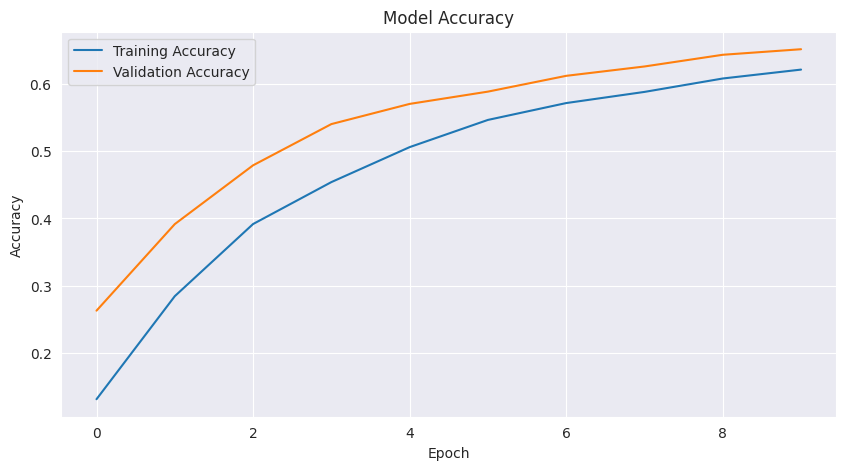

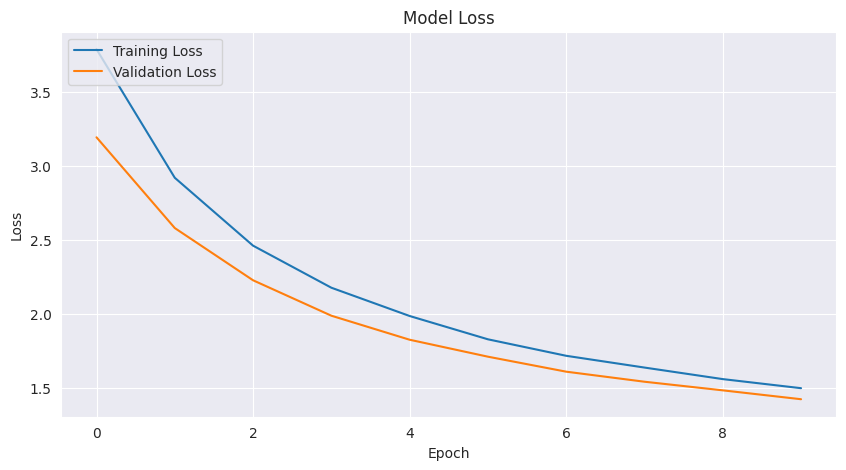

ValueError: Found input variables with inconsistent numbers of samples: [2301, 3068]

In [33]:


# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=history.history['accuracy'], label='Training Accuracy')
    sns.lineplot(data=history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

# Plot training & validation loss values
def plot_loss(history):
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=history.history['loss'], label='Training Loss')
    sns.lineplot(data=history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot sample prediction outputs
def plot_sample_predictions(X_test, y_test, y_pred_classes, class_names, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        sample_image = X_test[i].reshape(128, 128, 3)  # Adjust dimensions as needed
        plt.imshow(sample_image)
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_pred_classes[i]]}")
        plt.axis("off")
    plt.show()

# Assuming `history` is the training history from model.fit()
plot_accuracy(history)
plot_loss(history)

# Assuming `y_test` and `y_pred_classes` are the true and predicted labels
class_names = [f"Class {i}" for i in range(len(label_encoder.classes_))]
plot_confusion_matrix(y_test, y_pred_classes, class_names)
plot_accuracy(history)
plot_loss(history)
# Plot sample predictions
plot_sample_predictions(X_test, y_test, y_pred_classes, class_names)

39/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/home/hghosh/Desktop/CODING/Python/.venv/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


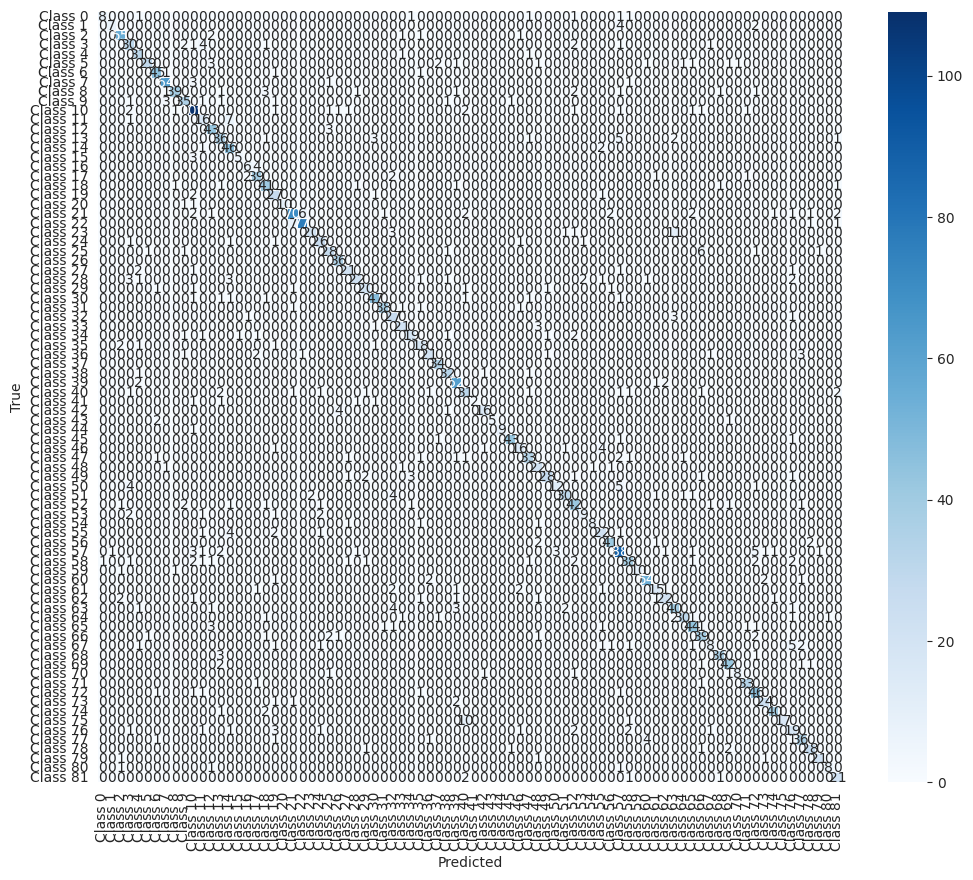

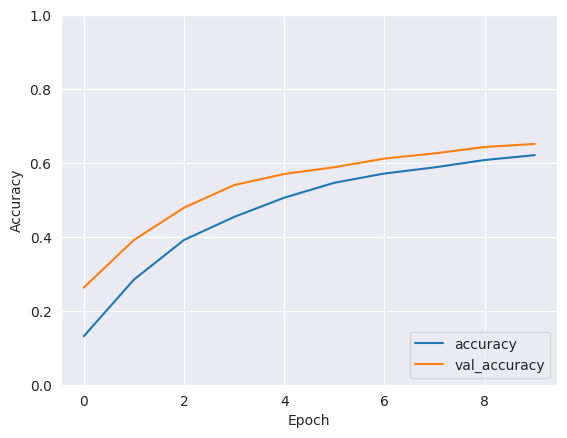

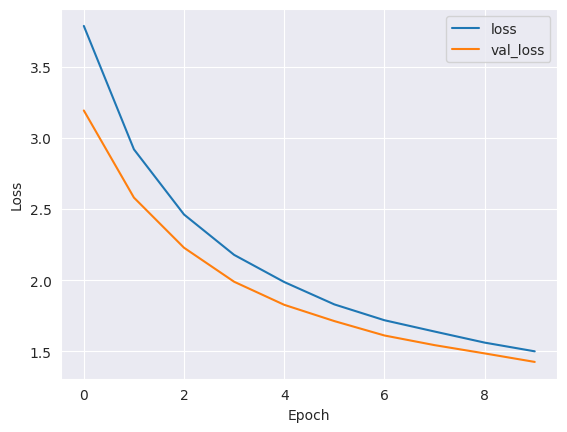

In [34]:
import numpy as np
import tensorflow as tf
import json
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50
import gc
from tensorflow.keras.backend import clear_session

# Load keypoints data
with open("keypoints (1).json", "r") as file:
    keypoint_data = json.load(file)

# Prepare feature matrix and labels
X = []  # Features
y = []  # Labels

for class_name, samples in keypoint_data.items():
    for sample in samples:
        X.append(sample["keypoints"])
        y.append(class_name)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Convert to numpy arrays
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

# Load the saved model
model = tf.keras.models.load_model("best_pose_detection_model.h5")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Ensure the lengths are consistent
assert len(y_test) == len(y_pred_classes), "Inconsistent lengths between y_test and y_pred_classes"

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Assuming `y_test` and `y_pred_classes` are the true and predicted labels
class_names = [f"Class {i}" for i in range(len(label_encoder.classes_))]
plot_confusion_matrix(y_test, y_pred_classes, class_names)

# Plot accuracy and loss
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

# Assuming `history` is the training history object
plot_accuracy(history)
plot_loss(history)